
# Project: TMDb movie data analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **note**: in This project we will analysis data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 


### Question(s) for Analysis
>**note**: the analysis will go throw five phases.
            1 - data wrangling: that means loading and exploring data. 
            2 - data cleaning : that means to clean or delete any issuse in data .
            3 - explor  : that means finding patterns in data visualizing relationships . 
            4 - draw conclusion : that means to draw conclusions or even make predictions .
            5 - communicate : finnaly communicate results to others . 
            
            i gonna find answers to the following questions 
            1 - which year has the most number of movies? 
            2-Which genres are most popular from year to year?
            3-Is there a relation between vote average on revenue? 
            


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

In [2]:
!pip install --upgrade pandas==0.25.0

     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     --------------------------------------- 0.0/12.6 MB 262.6 kB/s eta 0:00:48
     --------------------------------------- 0.0/12.6 MB 281.8 kB/s eta 0:00:45
     --------------------------------------- 0.1/12.6 MB 476.3 kB/s eta 0:00:27
      -------------------------------------- 0.2/12.6 MB 919.0 kB/s eta 0:00:14
     - -------------------------------------- 0.4/12.6 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.6/12.6 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/12.6 MB 2.2 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.6 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.6 MB 2.6 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.6 MB 2.7 MB/s eta 0:00:05
     ----- ---------------------------------- 1.6/12.6 MB 2.9 

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [919 lines of output]
  C:\Users\Omar_Abdelhamid\AppData\Local\Temp\pip-install-ivn6_u0v\pandas_ae73dfd185044007b7776f8c035b39e1\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  C:\Users\Omar_Abdelhamid\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
  running bdist_wheel
  running build
  running bui

<a id='wrangling'></a>
## Data Wrangling

> **note**: in this section, I will  load  data and explore any issues that need to clean or delet to make data more easily or clear 


In [5]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

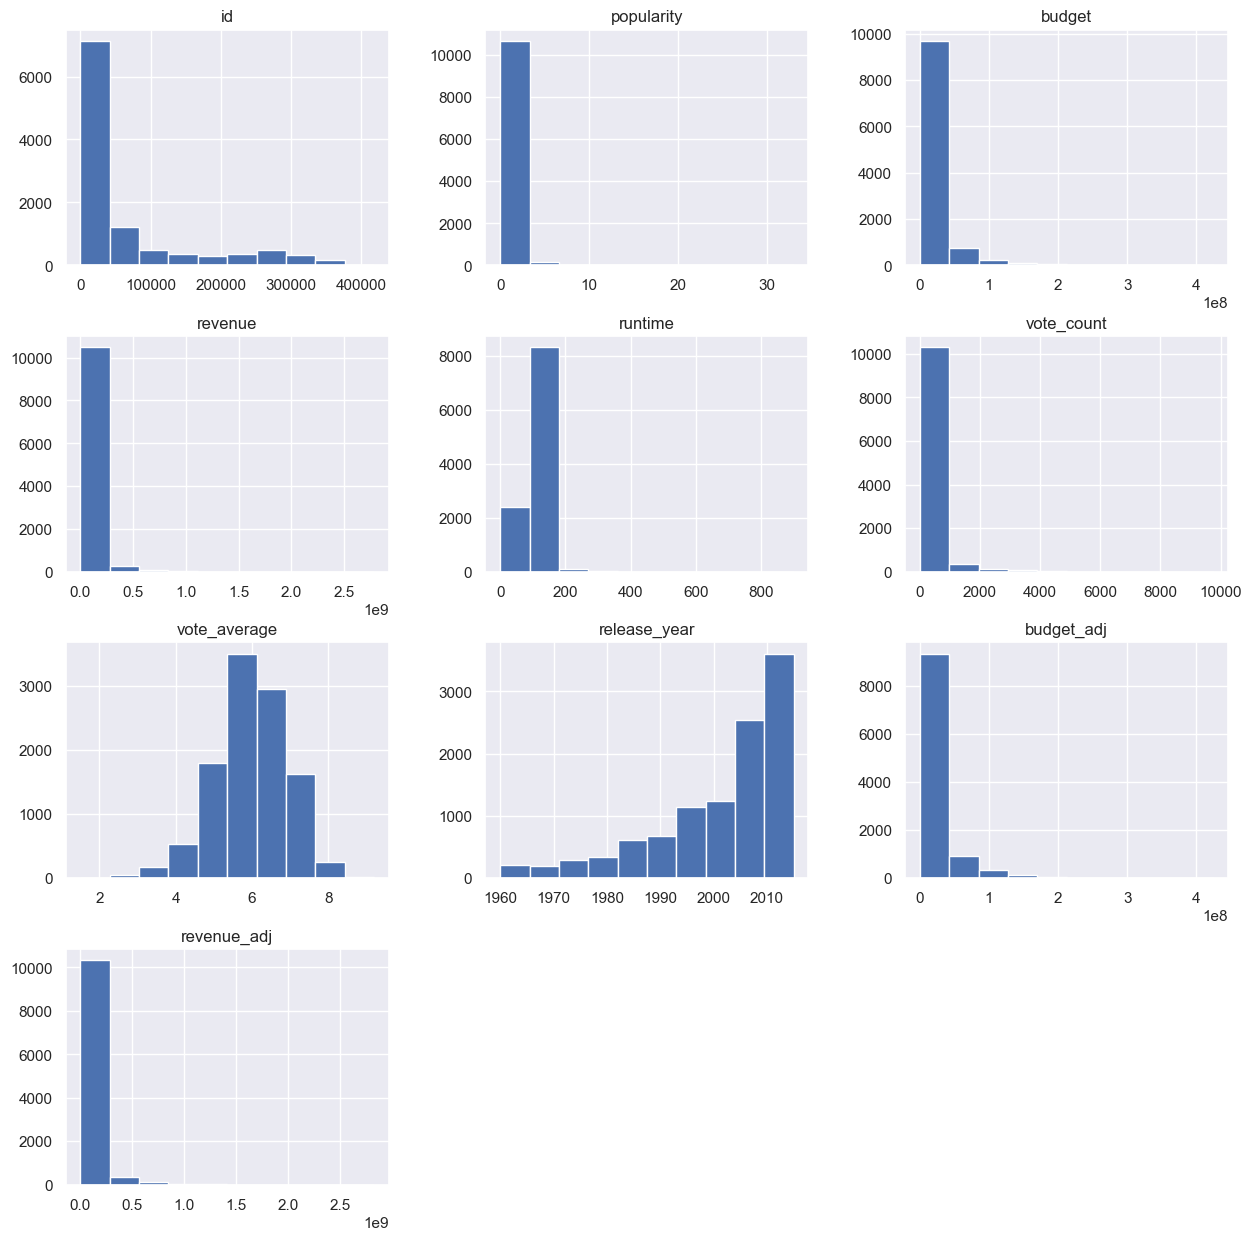

In [8]:
df.hist(figsize=(15,15));

In [9]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [10]:
df.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64


### Data Cleaning
> **note**: I found two issues in the data 
              - many columns we don't need  in our analysis . 
              - 
 

first delete columns that we don't need in our analysis. 

In [11]:
df=df.drop(columns=['cast','tagline','imdb_id','homepage','revenue_adj','budget_adj',])

In [12]:
df.head(1)

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Which genres are most popular from year to year? 

In [13]:
d_genre=df['genres'].str.get_dummies(sep='|') 

In [14]:
d_genre1=d_genre.sum().reset_index()

In [18]:
d_genre1.head(3)

,index,0
0,Action,2385
1,Adventure,1471
2,Animation,699


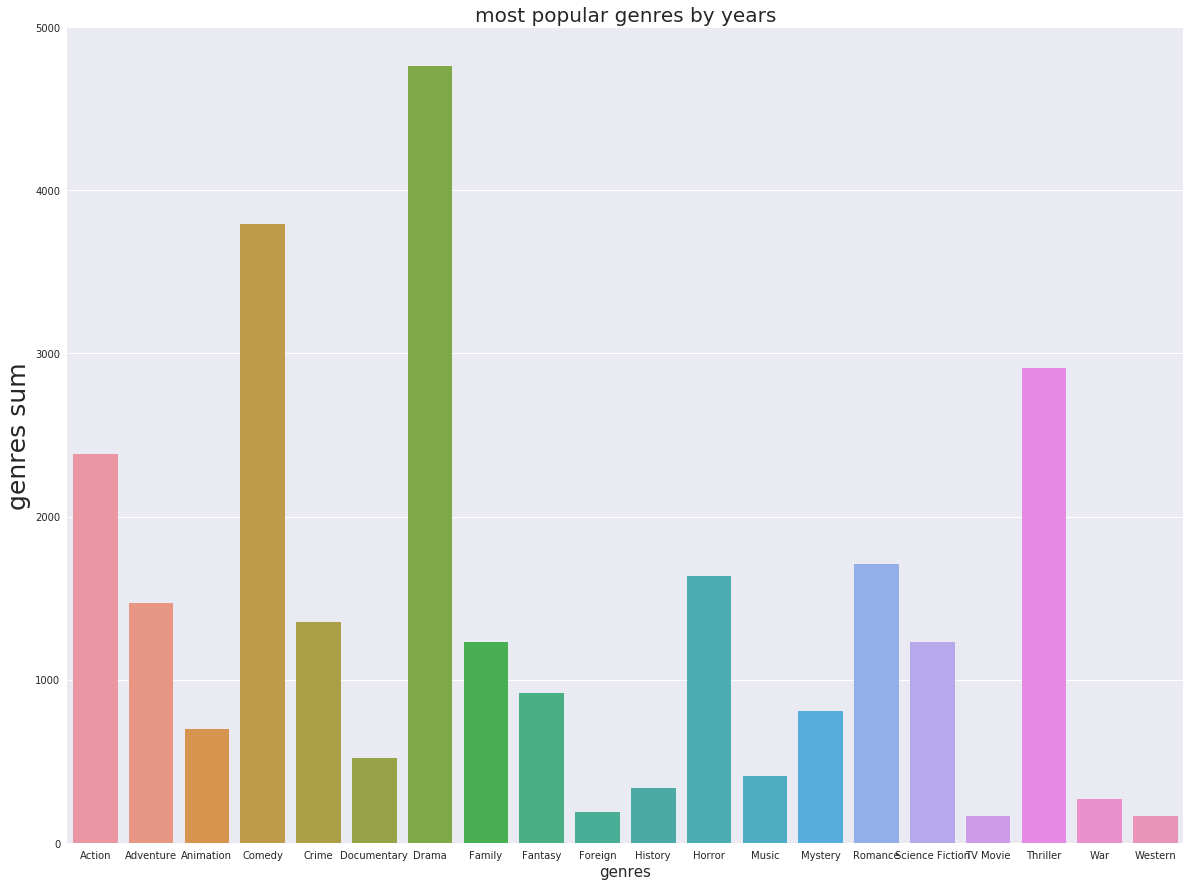

In [13]:
plt.figure(figsize=(20,15))
sns.barplot( x =d_genre.columns, y =d_genre.sum(), data =d_genre1)
plt.title ('most popular genres by years' , fontsize = 20)
plt.xlabel('genres', fontsize = 15 )
plt.ylabel('genres sum',fontsize=25)
plt.show()

for above grave we can say that the most popular genres from year to year is Drama , comedy m

Which movie are most voted? , which movie has the lowest vote ? and how the number of note count for movies have changed over the years ?


In [19]:
print (df.original_title[df['vote_count']==df['vote_count'].max()])

1919    Inception
Name: original_title, dtype: object


In [20]:
print (df.original_title[df['vote_count']==df['vote_count'].min()])

240                       The Unspoken
259                Crown for Christmas
298        The Girl in the Photographs
345      Jesse Stone: Lost in Paradise
386                           Bridgend
                     ...              
10802                           Fedora
10808                      The Manitou
10809           Someone's Watching Me!
10812                   Gray Lady Down
10857                     Nevada Smith
Name: original_title, Length: 501, dtype: object


which year has the most number of movies  ? 

In [26]:
plt.figure(figsize=(20,11))
m=df['release_year'].coun()
sns.countplot( m)
plt.title ('movies relased per year' , fontsize = 20)
plt.xlabel('year', fontsize = 15 )
plt.ylabel('number of movies',fontsize=25)
plt.show()

AttributeError: 'Series' object has no attribute 'coun'

<Figure size 2000x1100 with 0 Axes>

above grave shows that 2014 has the most number of movies

 Question 3: Is there a relation between vote average on revenue?


In [28]:
revenue_without_zero = df.query('revenue>0')
revenue_median = revenue_without_zero['revenue'].median()
max_revenue = revenue_without_zero.query('revenue >= {}'.format(revenue_median))
min_revenue = revenue_without_zero.query('revenue < {}'.format(revenue_median))
revenue_without_zero['revenue'].count() == max_revenue['revenue'].count() + min_revenue['revenue'].count()

True

In [30]:
vote_max2_mean = max_revenue['vote_average'].mean()
vote_min2_mean = min_revenue['vote_average'].mean()
vote_max2_mean, vote_min2_mean

(6.2705567010309275, 6.026969072164948)

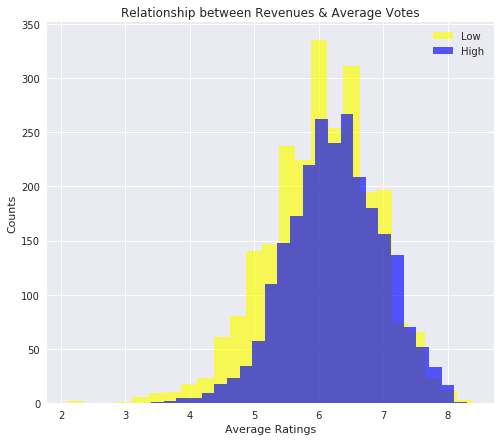

In [35]:
fig2, ax2 = plt.subplots(figsize=(8,7))
ax2.hist(min_revenue['vote_average'], alpha=0.65, label='Low', bins=25, color='yellow')
ax2.hist(max_revenue['vote_average'], alpha=0.65, label='High', bins=25, color='blue')
ax2.set_title('Relationship between Revenues & Average Votes')
ax2.set_xlabel('Average Ratings')
ax2.set_ylabel('Counts')
ax2.legend()
plt.show()

for above grave it shows that the most of the user ratings are between 5 and 7

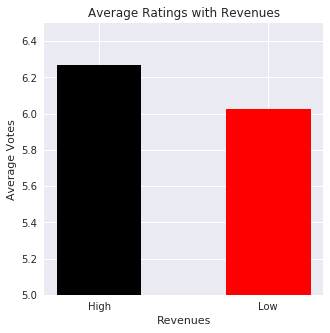

In [36]:
locations = [1, 2]
heights = [vote_max2_mean , vote_min2_mean]
labels = ['High', 'Low']
plt.figure(figsize=(5,5))
plt.bar(locations, heights, tick_label=labels, width=0.5, color=['black', 'red'])
plt.title('Average Ratings with Revenues')
plt.xlabel('Revenues')
plt.ylabel('Average Votes')
plt.ylim([5,6.5]);

for above grave it shows  High Revenues movies in the dataset have a bit more average ratings than low Revenues ones.

<a id='conclusions'></a>
## Conclusions

> **note**:: as above graves we can note that the most  popular genres from year to year is Drama, movie are most voted is Inception,  movie has the lowest vote is  The Unspoken and  2014 has the most number of movies and there is the relationship between high revenue on vote average that the high revenues have a high rating on average 


## Limitations

I found many columns with 0 values and null values it made my analysis very hard  
and I had a problem with understanding what 'popularity' refers to, or how it was calculated, I found some relationships between the variables in my analysis but I can not name it causation yet.
and I can't replace 0 values with means because budgets or revenues are dependent on other values, but still, either way, there would still be missing movies among my lists thanks to missing values



In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0